In [4]:
import pandas as pd
import numpy as np
from collections import Counter

In [6]:
london_listing_df = pd.read_csv('data/london_listings.csv')
london_listing_df = london_listing_df[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]


In [7]:
london_listing_df.fillna(0, inplace=True)


In [8]:
price = london_listing_df['price']
prices=[]

In [9]:
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

In [10]:
london_listing_df['price']=prices


In [11]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
london_listing_df = london_listing_df[london_listing_df.bathrooms >0]
london_listing_df = london_listing_df[london_listing_df.bedrooms > 0]
london_listing_df = london_listing_df[london_listing_df.beds > 0]
london_listing_df = london_listing_df[london_listing_df.price  > 0]
london_listing_df = london_listing_df[london_listing_df.review_scores_rating  > 0]
london_listing_df = london_listing_df[london_listing_df.reviews_per_month > 0]
london_listing_df = london_listing_df[london_listing_df.accommodates  > 0]
london_listing_df.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
1,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,-0.16898,51.48796,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,t,It is Chelsea.,Kensington and Chelsea,...,Entire home/apt,2,1.0,1.0,1.0,0.71,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,89,100.0
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,-0.14094,51.52195,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,t,"Location, location, location! You won't find b...",Westminster,...,Entire home/apt,6,2.0,3.0,3.0,0.38,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",strict_14_with_grace_period,42,300.0
4,25023,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",-0.21874,51.44687,10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",t,This is a leafy residential area with excellen...,Wandsworth,...,Entire home/apt,4,1.0,2.0,2.0,0.70,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",moderate,35,65.0
6,33332,Beautiful Ensuite Richmond-upon-Thames borough,"Walking distance to Twickenham Stadium, 35 min...",-0.32421,51.46507,This is a spacious Bedsit + En-Suite at the to...,"Walking distance to Twickenham Stadium, 35 min...",f,Peaceful and friendly.,Hounslow,...,Private room,2,1.0,1.0,1.0,0.05,"{Wifi,Kitchen,""Pets live on this property"",Cat...",flexible,6,100.0
7,36299,Kew Gardens 3BR house in cul-de-sac,3 Bed House with garden close to Thames river ...,-0.28066,51.47934,"Residential neighborhood, mix of English and c...",3 Bed House with garden close to Thames river ...,f,"Residential family neighborhood, with both Eng...",Richmond upon Thames,...,Entire home/apt,5,1.5,3.0,3.0,0.67,"{TV,Internet,Wifi,Kitchen,Heating,""Family/kid ...",moderate,77,195.0


In [12]:
roomType_df=london_listing_df.groupby('room_type').id.count()
roomType_df=roomType_df.reset_index()
roomType_df=roomType_df.rename(columns={'id':'number_Of_Listings'})
roomType_df

,room_type,number_Of_Listings
0,Entire home/apt,33060
1,Hotel room,420
2,Private room,23491
3,Shared room,302


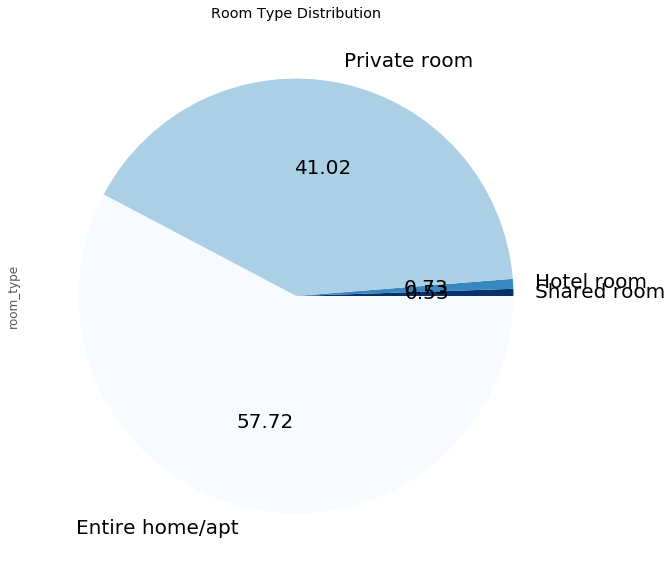

In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = london_listing_df.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

Text(0, 0.5, 'Number of listings')

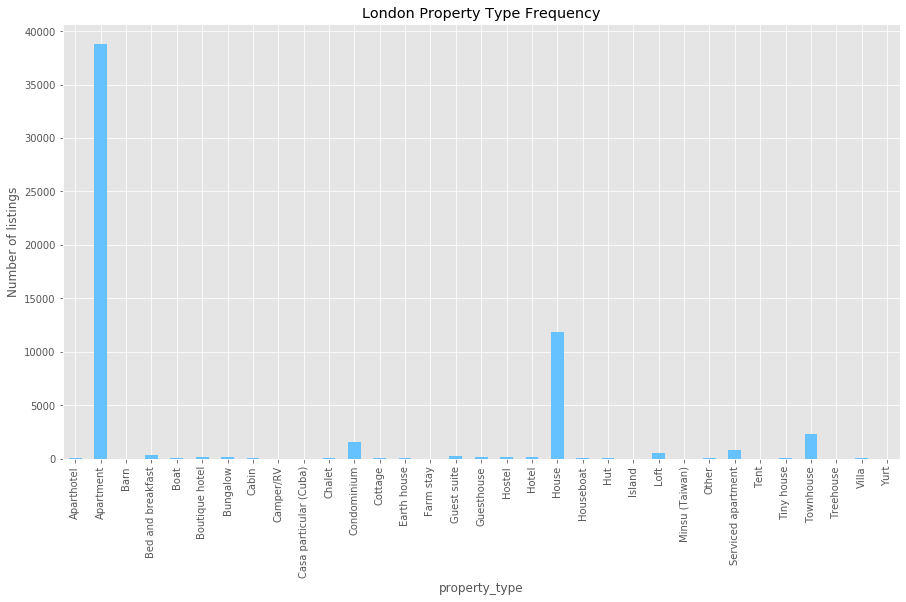

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_df = london_listing_df.groupby('property_type').id.count()
propertytype_df = propertytype_df.reset_index()
propertytype_df = propertytype_df.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_df['property_type']
y_pos = propertytype_df['Number_Of_Listings']

propertytype_df.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'London Property Type Frequency', 
           legend = False)
plt.ylabel('Property Type')
plt.ylabel('Number of listings')

In [15]:
london_listing_df.to_json("London_Listing.json")
len(london_listing_df)

57273

In [16]:
from sqlalchemy import create_engine
#Create sqlite Engine
db = create_engine('sqlite:///LondonAirbnb.sqlite')

In [17]:
# Move the Warrick county data to UnemploymentData Table
london_listing_df.to_sql('LondonAirbnb', con=db, if_exists='append')
london_listing_df1 = pd.read_sql_query('SELECT * FROM LondonAirbnb',db)
london_listing_df1.head()

,index,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,1,15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,-0.16898,51.48796,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,t,It is Chelsea.,...,Entire home/apt,2,1.0,1.0,1.0,0.71,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",strict_14_with_grace_period,89,100.0
1,2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,-0.14094,51.52195,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,t,"Location, location, location! You won't find b...",...,Entire home/apt,6,2.0,3.0,3.0,0.38,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",strict_14_with_grace_period,42,300.0
2,4,25023,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",-0.21874,51.44687,10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",t,This is a leafy residential area with excellen...,...,Entire home/apt,4,1.0,2.0,2.0,0.70,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",moderate,35,65.0
3,6,33332,Beautiful Ensuite Richmond-upon-Thames borough,"Walking distance to Twickenham Stadium, 35 min...",-0.32421,51.46507,This is a spacious Bedsit + En-Suite at the to...,"Walking distance to Twickenham Stadium, 35 min...",f,Peaceful and friendly.,...,Private room,2,1.0,1.0,1.0,0.05,"{Wifi,Kitchen,""Pets live on this property"",Cat...",flexible,6,100.0
4,7,36299,Kew Gardens 3BR house in cul-de-sac,3 Bed House with garden close to Thames river ...,-0.28066,51.47934,"Residential neighborhood, mix of English and c...",3 Bed House with garden close to Thames river ...,f,"Residential family neighborhood, with both Eng...",...,Entire home/apt,5,1.5,3.0,3.0,0.67,"{TV,Internet,Wifi,Kitchen,Heating,""Family/kid ...",moderate,77,195.0


In [18]:
len(london_listing_df1)

57273